In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/comp_data_anal
'''
%cd /kaggle/input/top-youtuber-worldwide


/kaggle/input/top-youtuber-worldwide


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv('Youtuber.csv')[1:]
df.head()

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys


In [3]:
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')
        return float(x)
    return x

df['Subscribers'] = df['Subscribers'].apply(convert_to_number)
df['Average Views'] = df['Average Views'].apply(convert_to_number)
df['Average Likes'] = df['Average Likes'].apply(convert_to_number)
df['Average Comments'] = df['Average Comments'].apply(convert_to_number)

df['Views per Subscriber'] = df['Average Views'] / df['Subscribers']
df['Likes per Subscriber'] = df['Average Likes'] / df['Subscribers']
df['Comments per Subscriber'] = df['Average Comments'] / df['Subscribers']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 1 to 1045
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1045 non-null   float64
 1   Channel Name             1045 non-null   object 
 2   Category                 695 non-null    object 
 3   Subscribers              1045 non-null   float64
 4   Country                  853 non-null    object 
 5   Average Views            1045 non-null   float64
 6   Average Likes            1045 non-null   float64
 7   Average Comments         1045 non-null   float64
 8   Content Type             335 non-null    object 
 9   Views per Subscriber     1045 non-null   float64
 10  Likes per Subscriber     1045 non-null   float64
 11  Comments per Subscriber  1045 non-null   float64
dtypes: float64(8), object(4)
memory usage: 98.1+ KB


In [5]:
df.describe()

,Rank,Subscribers,Average Views,Average Likes,Average Comments,Views per Subscriber,Likes per Subscriber,Comments per Subscriber
count,1045.000000,1.045000e+03,1.045000e+03,1.045000e+03,1045.000000,1045.000000,1045.000000,1.045000e+03
mean,521.055502,2.246191e+07,9.935658e+05,4.331511e+04,1281.757895,0.044486,0.002018,5.886090e-05
std,298.709262,1.744217e+07,3.871218e+06,1.628324e+05,9028.006321,0.104326,0.005224,4.057834e-04
min,1.000000,1.250000e+07,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,262.000000,1.420000e+07,3.630000e+04,5.430000e+02,3.000000,0.001667,0.000025,1.492537e-07
50%,523.000000,1.740000e+07,1.806000e+05,3.800000e+03,63.000000,0.009500,0.000188,3.511450e-06
75%,784.000000,2.410000e+07,8.374000e+05,2.760000e+04,369.000000,0.040351,0.001487,2.169118e-05
max,1000.000000,2.584000e+08,1.040000e+08,4.000000e+06,235000.000000,2.050691,0.069124,1.151961e-02


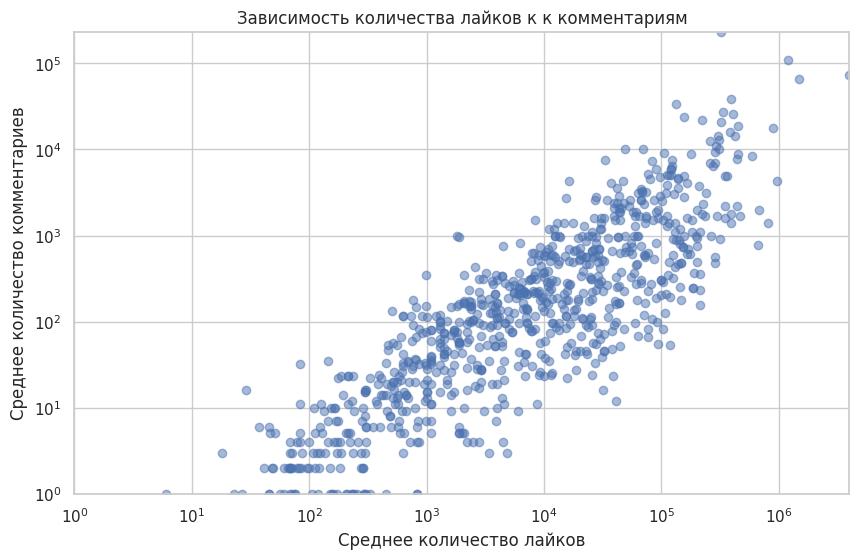

In [6]:
df['Likes to Comments Ratio'] = df['Average Likes'] / df['Average Comments'].replace(0, 1)  # Замена нулей на единицы для избежания деления на ноль

plt.figure(figsize=(10, 6))
plt.scatter(df['Average Likes'], df['Average Comments'], alpha=0.5)
plt.title('Зависимость количества лайков к к комментариям')
plt.xlabel('Среднее количество лайков')
plt.ylabel('Среднее количество комментариев')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, df['Average Likes'].max())  # Изменение лимита для исключения нулевых значений
plt.ylim(1, df['Average Comments'].max())  # Изменение лимита для исключения нулевых значений
plt.grid(True)
plt.show()

price_commet_in_likes = df['Likes to Comments Ratio'].mean()

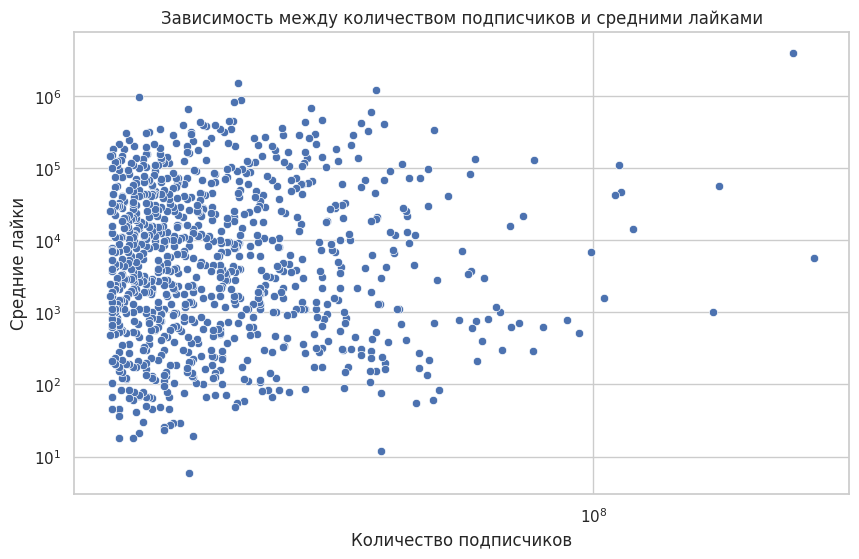

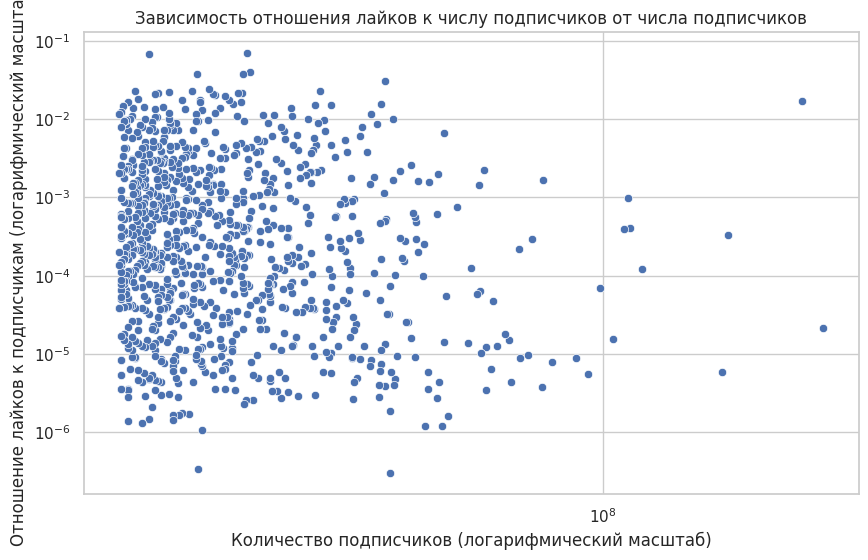

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Average Likes', data=df)
plt.title('Зависимость между количеством подписчиков и средними лайками')
plt.xlabel('Количество подписчиков')
plt.ylabel('Средние лайки')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Likes per Subscriber', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Зависимость отношения лайков к числу подписчиков от числа подписчиков')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Отношение лайков к подписчикам (логарифмический масштаб)')
plt.show()



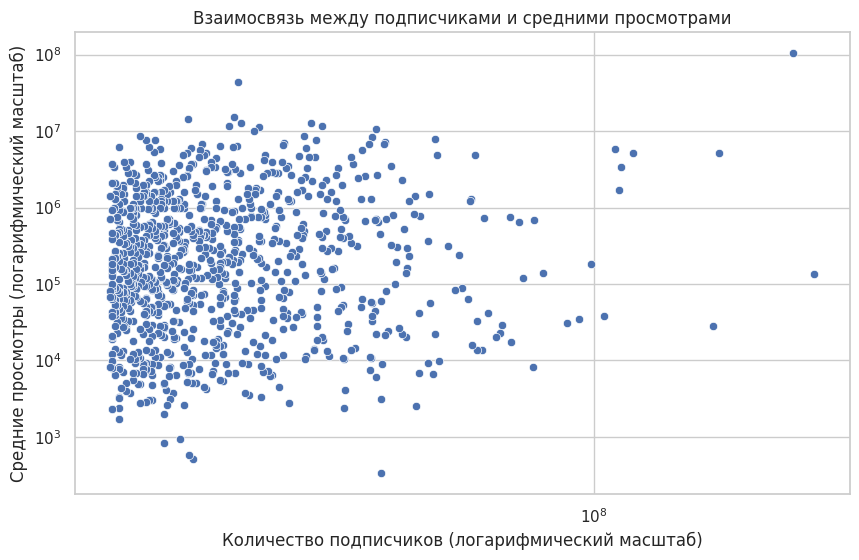

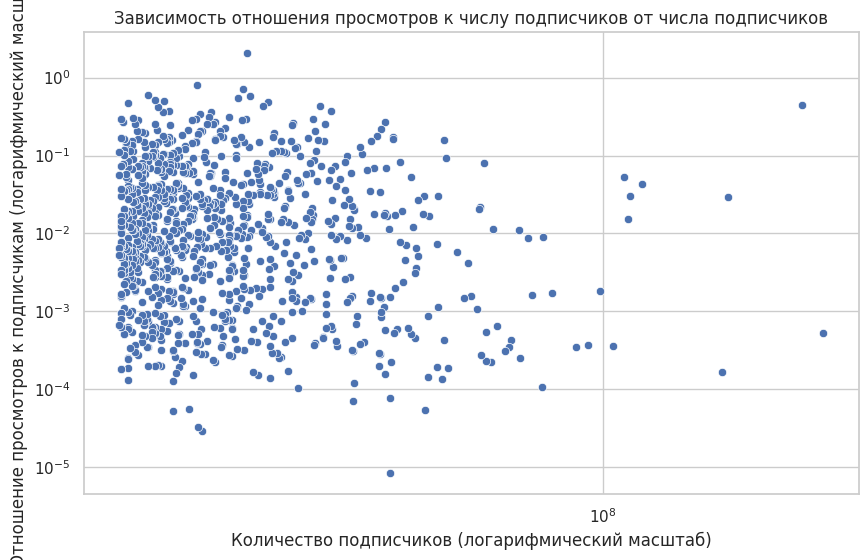

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Average Views', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Взаимосвязь между подписчиками и средними просмотрами')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Средние просмотры (логарифмический масштаб)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Views per Subscriber', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Зависимость отношения просмотров к числу подписчиков от числа подписчиков')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Отношение просмотров к подписчикам (логарифмический масштаб)')
plt.show()



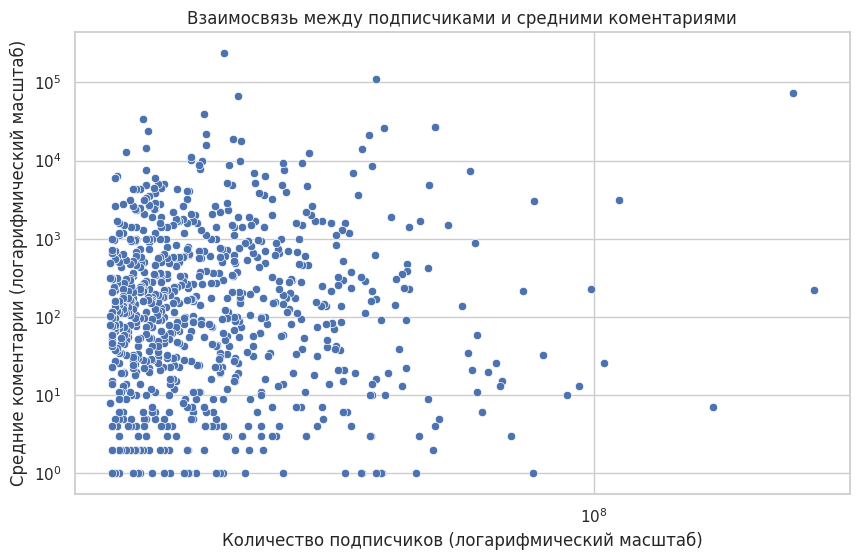

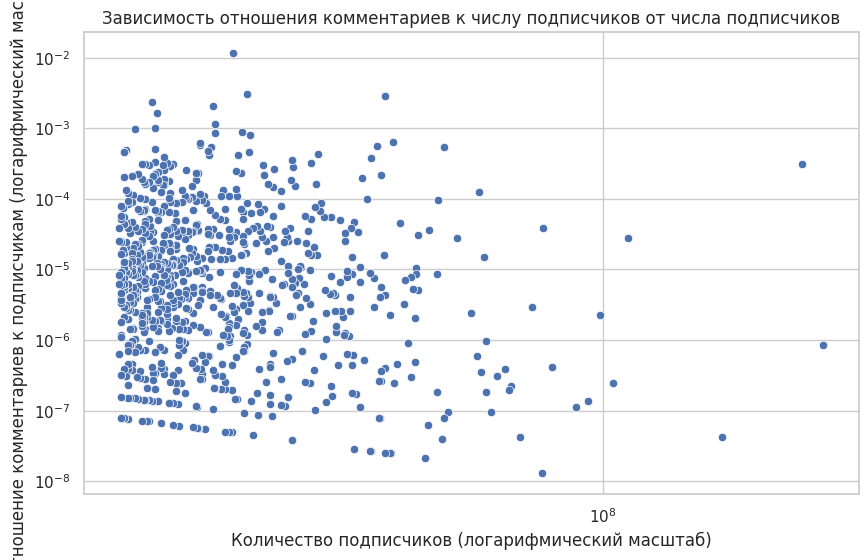

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Average Comments', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Взаимосвязь между подписчиками и средними коментариями')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Средние коментарии (логарифмический масштаб)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscribers', y='Comments per Subscriber', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Зависимость отношения комментариев к числу подписчиков от числа подписчиков')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Отношение комментариев к подписчикам (логарифмический масштаб)')
plt.show()


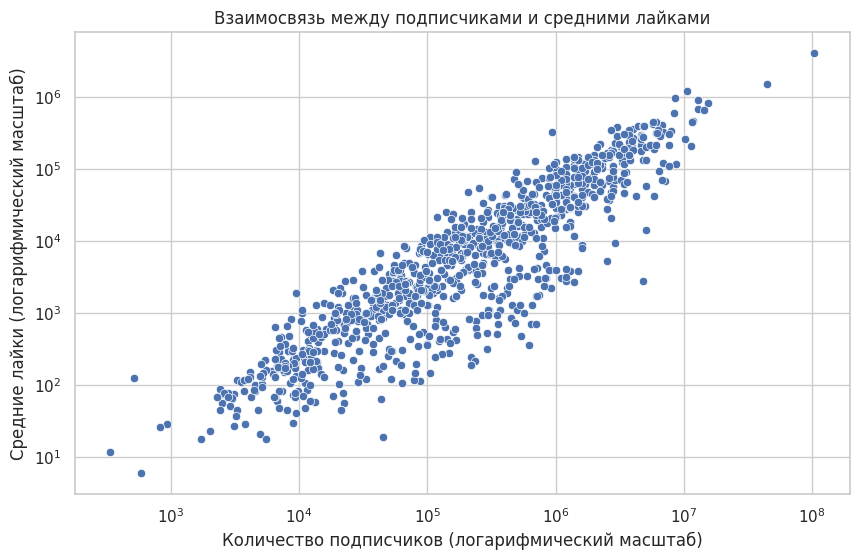

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Views', y='Average Likes', data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Взаимосвязь между подписчиками и средними лайками')
plt.xlabel('Количество подписчиков (логарифмический масштаб)')
plt.ylabel('Средние лайки (логарифмический масштаб)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


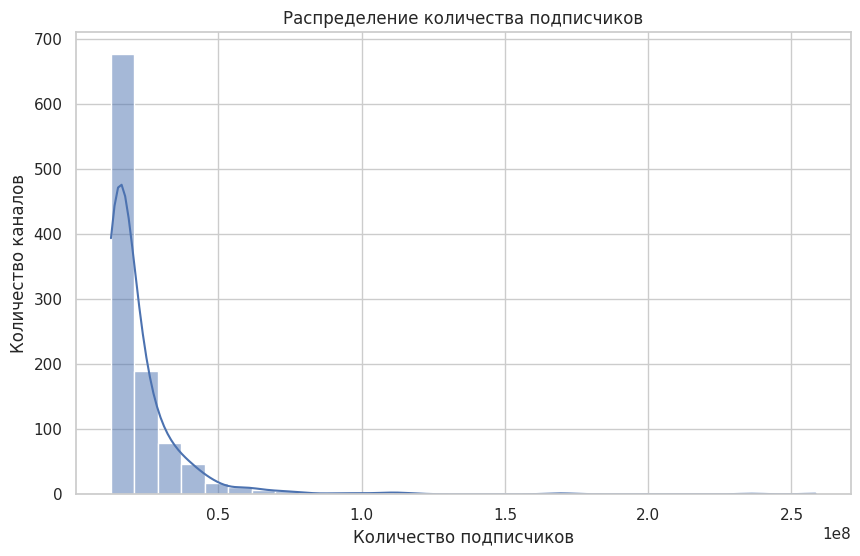

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Subscribers'], kde=True, bins=30)
plt.title('Распределение количества подписчиков')
plt.xlabel('Количество подписчиков')
plt.ylabel('Количество каналов')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


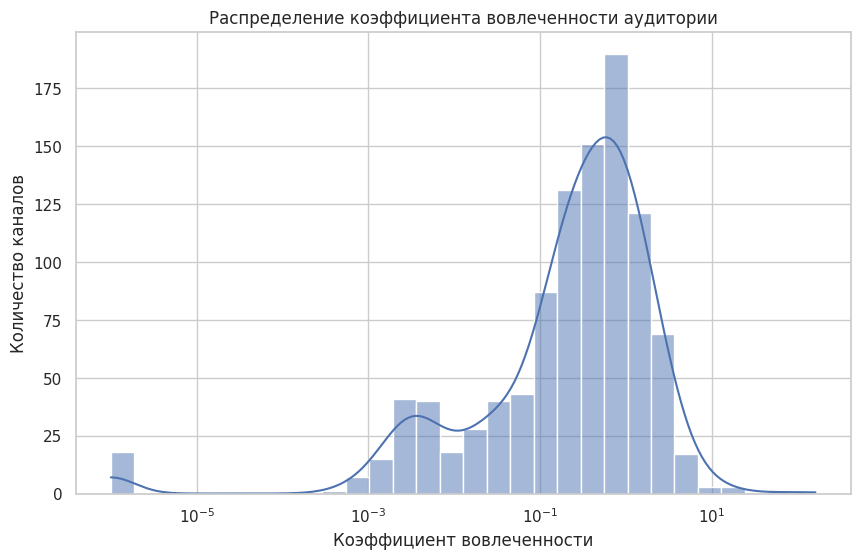

In [12]:
df['Likes per View'] = df['Average Likes'] / df['Average Views']
df['Comments per View'] = df['Average Comments'] / df['Average Views']
df['Engagement Rate'] = (df['Average Likes'] + df['Average Comments'] * price_commet_in_likes) / df['Average Views']

plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement Rate'] + 1e-6, bins=30, kde=True, log_scale=True)
plt.title('Распределение коэффициента вовлеченности аудитории')
plt.xlabel('Коэффициент вовлеченности')
plt.ylabel('Количество каналов')
plt.show()


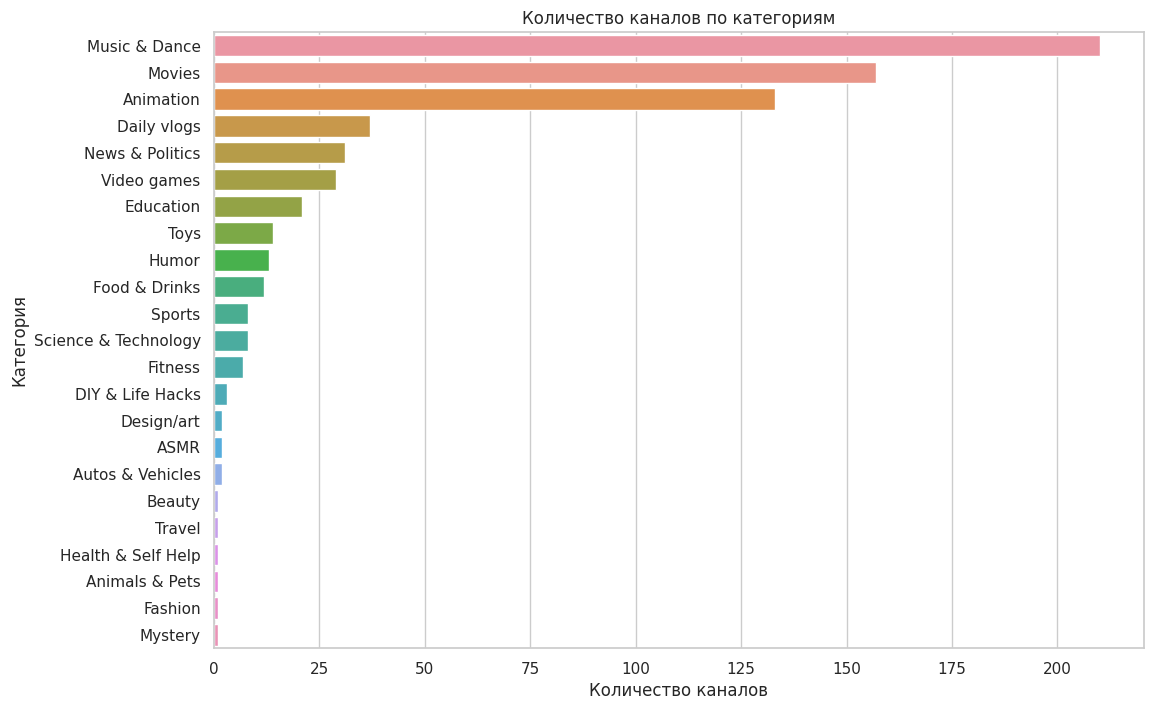

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index)
plt.title('Количество каналов по категориям')
plt.xlabel('Количество каналов')
plt.ylabel('Категория')
plt.show()


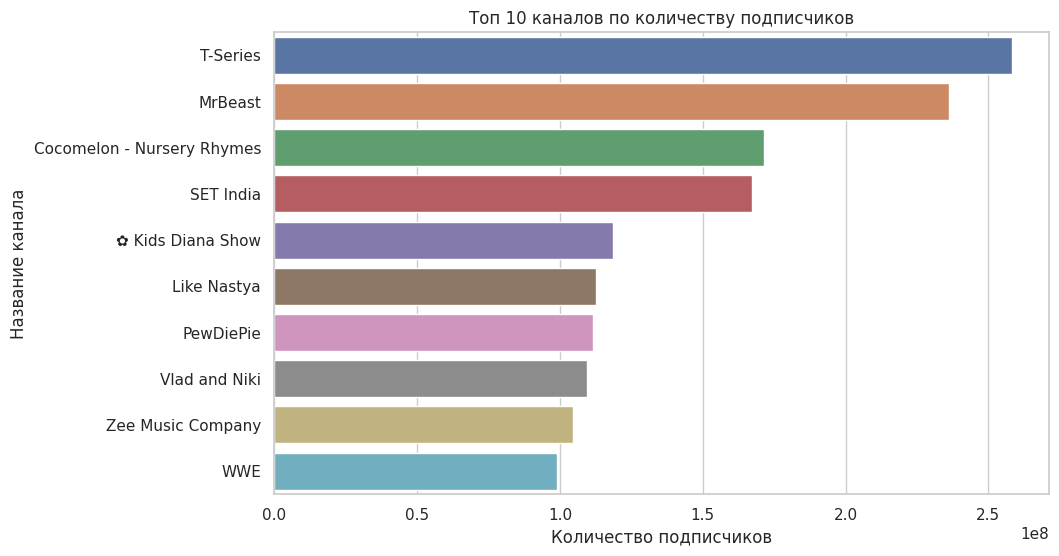

In [14]:
top_channels = df.sort_values('Subscribers', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Subscribers', y='Channel Name', data=top_channels)
plt.title('Топ 10 каналов по количеству подписчиков')
plt.xlabel('Количество подписчиков')
plt.ylabel('Название канала')
plt.show()


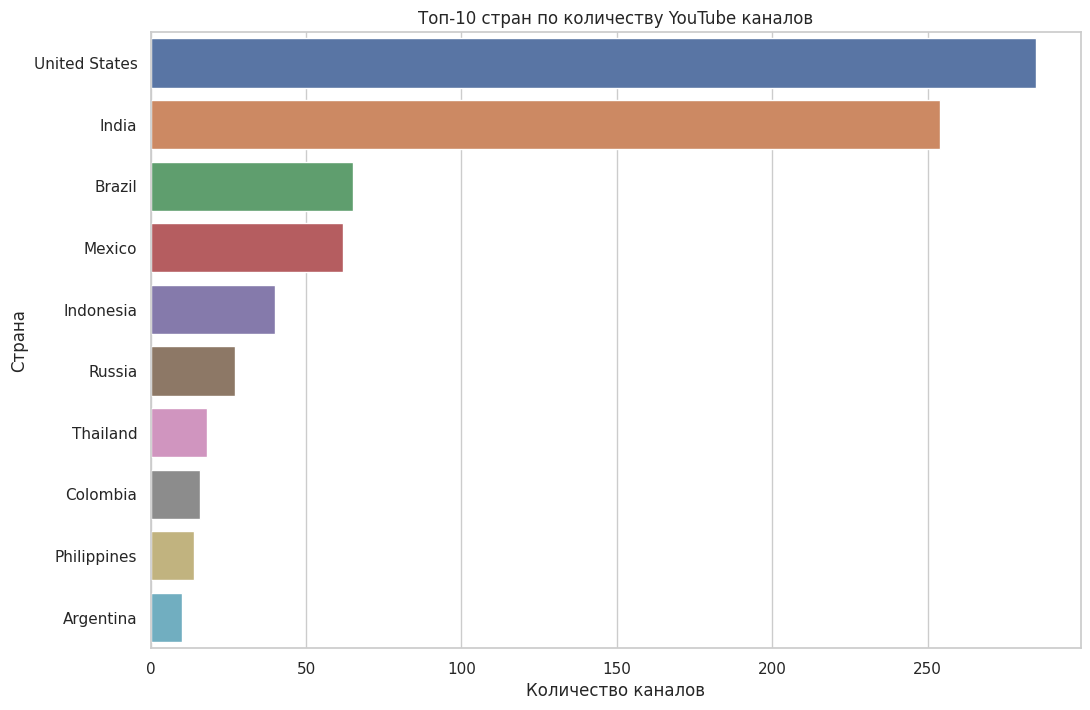

In [15]:
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts().head(10)  # Топ-10 стран
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Топ-10 стран по количеству YouTube каналов')
plt.xlabel('Количество каналов')
plt.ylabel('Страна')
plt.show()


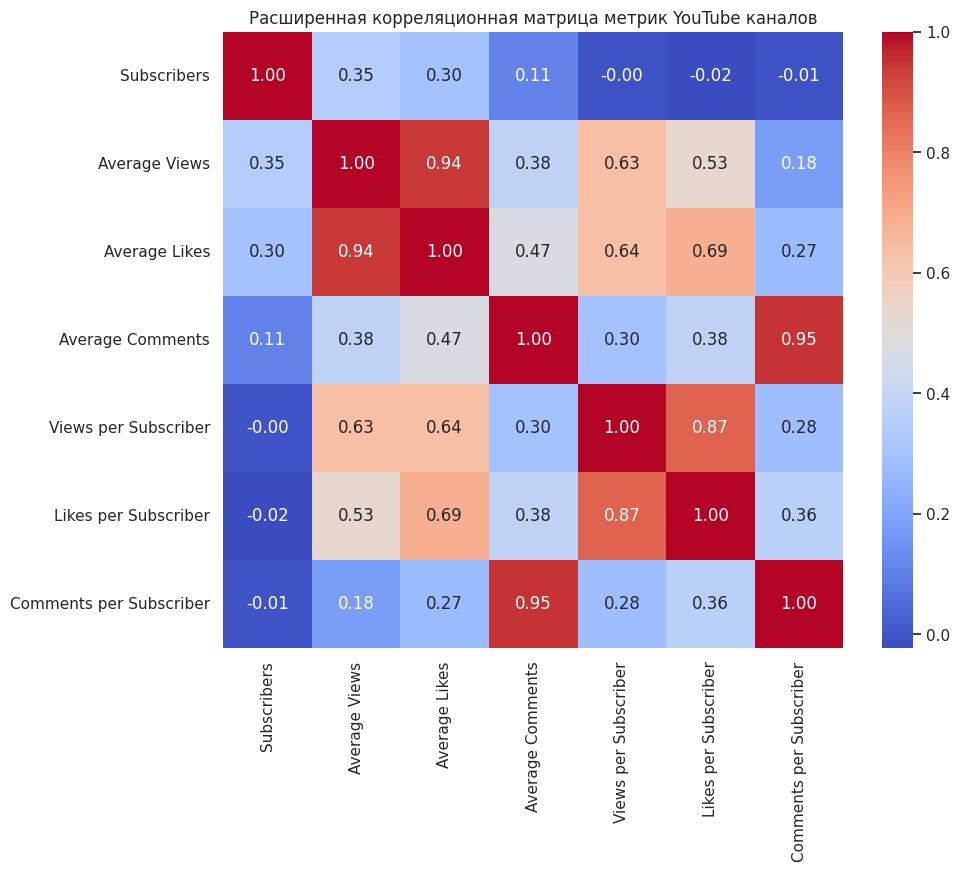

In [16]:
corr = df[['Subscribers', 'Average Views', 'Average Likes', 'Average Comments',
           'Views per Subscriber', 'Likes per Subscriber', 'Comments per Subscriber']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Расширенная корреляционная матрица метрик YouTube каналов')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


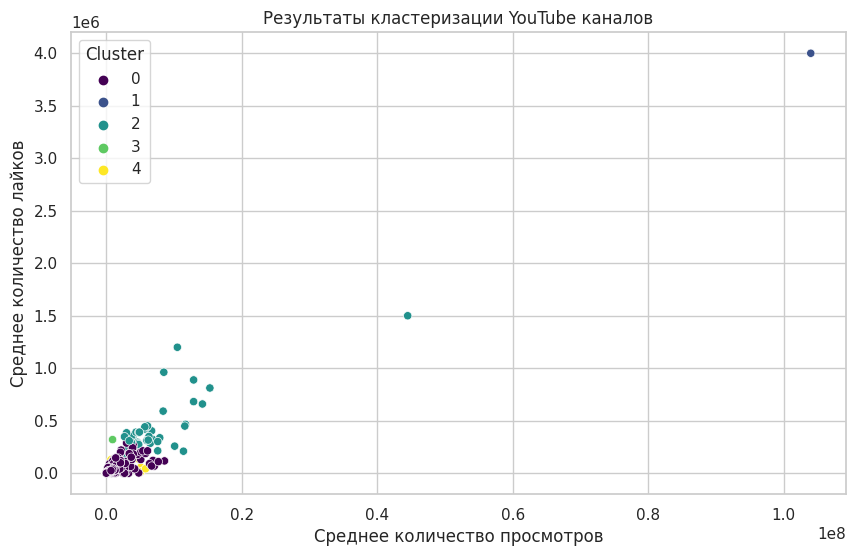

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[['Subscribers', 'Average Views', 'Average Likes', 'Average Comments']].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Views', y='Average Likes', hue='Cluster', data=df, palette='viridis')
plt.title('Результаты кластеризации YouTube каналов')
plt.xlabel('Среднее количество просмотров')
plt.ylabel('Среднее количество лайков')
plt.show()


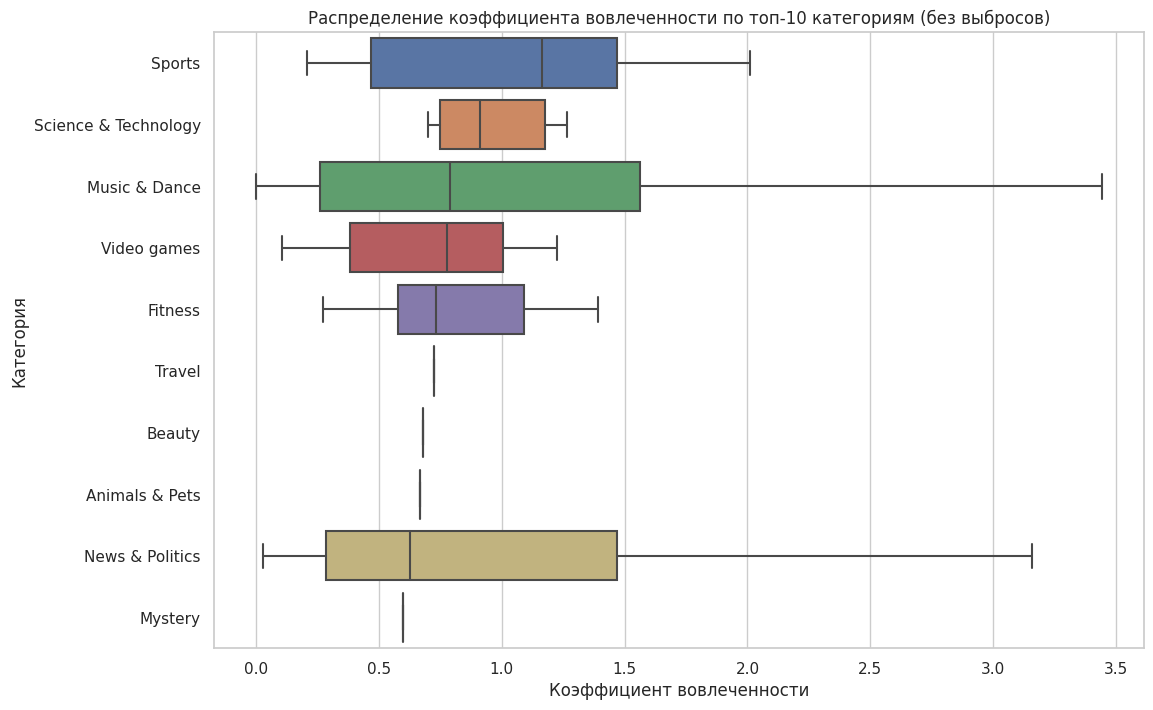

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engagement Rate', y='Category', data=df,
            order=df.groupby('Category')['Engagement Rate'].median().sort_values(ascending=False).index[:10],
            showfliers=False)
plt.title('Распределение коэффициента вовлеченности по топ-10 категориям (без выбросов)')
plt.xlabel('Коэффициент вовлеченности')
plt.ylabel('Категория')
plt.show()
